<a href="https://colab.research.google.com/github/ogabrielcustodio/intervaloConfianca/blob/main/intervaloConfianca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intervalo de Confiança

Intervalo de confiança é o nível de confiança que podemos ter em relação a média amostral ser próxima a média real da população em um determinado intervalo de valores.

In [4]:
import numpy as np
from scipy import stats

In [2]:
dados = np.array([1.66, 1.50, 1.73, 1.60, 1.78, 1.80, 1.53, 1.90])

In [9]:
media = np.mean(dados)

## Erro padrão

Mede a precisão da média amostral como estimativa da média populacional, te informando o quão confiável é sua estimativa da média populacional com base na sua média amostral.

In [4]:
erro_padrao = np.std(dados,ddof=1)/np.sqrt(len(dados))

## Nível de confiança

Quantifica a confiabilidade em percentual dos dados obtidos em uma pesquisa. Os níves de confiança mais comuns são:
- 95%
- 90%
- 99%
Sendo que o nível de confiança de 95% é o mais utilizado em testes estatísticos.

In [5]:
nivel_confianca = 0.95

## Graus de liberdade

Permite encontrar dentro de um nível de confiança o percentual que pode ser aceito ainda que haja erro.

In [6]:
df = len(dados)-1

## Valor crítico

Embora tenha sido usado o cálculo do valor crítico nessa atividade que tem apenas uma amostra, é mais útil usá-lo em situações com mais de uma amostra, uma vez que o valor crítico irá nos ajudar a definir a real diferença entre as duas amostras e se essa diferença é significativa, nos ajudando a analisar melhor as hipóteses verdadeiras e as hipóteses falsa.

In [32]:
valor_critico = stats.t.ppf(1-(1- nivel_confianca)/2,df)

## Margem de erro

Representa a distância máxima entre o valor obtido na amostra e o valor real da população.
- margem de erro pequena indica que a amostra está mais próxima do valor real da população.
- margem de erro grande indica que amostra está mais distante do valor real da população.

In [33]:
margem_erro = valor_critico * erro_padrao

## Intervalo de confiança

Acima foi explicado a definição de intervalo de confiança, abaixo está o código em que é expresso o intervalo que estima a real média da população, ou seja, o a real média da população está no intervalo de x a y, levando em consideração uma margem de erro para menos e para mais.

In [10]:
intervalo_confianca = (media-margem_erro, media+margem_erro)

## Representação gráfica usando matplotlib

In [26]:
import matplotlib.pyplot as plt

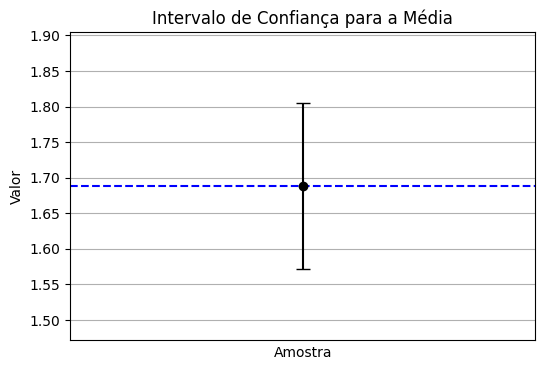

In [30]:
x = [1]
y = media
yerr = margem_erro
plt.figure(figsize=(6, 4))
plt.errorbar(x, y, yerr=yerr, fmt='o', color='black', capsize=5)
plt.axhline(y=media, color='blue', linestyle='--')
plt.title('Intervalo de Confiança para a Média')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.xlim(0.5, 1.5)
plt.ylim(min(intervalo_confianca) - 0.1, max(intervalo_confianca) + 0.1)
plt.xticks([])
plt.grid(True)
plt.show()

# Intervalo de confiança com uso da função tinterval da lib stats

In [1]:
alturas = [1.65,1.70,1.55,1.60,1.80,1.50,1.45,1.90]

In [2]:
confianca = 0.95

In [5]:
intervalo_confianca = stats.t.interval(confianca,len(alturas)-1,loc=np.mean(alturas),scale=stats.sem(alturas))

In [7]:
intervalo_confianca

(1.5164944256116368, 1.7710055743883628)